#Tenseflow Regression

Yes, self explanotary

Comparison with Sklearn

In [52]:
import pandas as pd
import numpy as np

import category_encoders as ce
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

<Axes: >

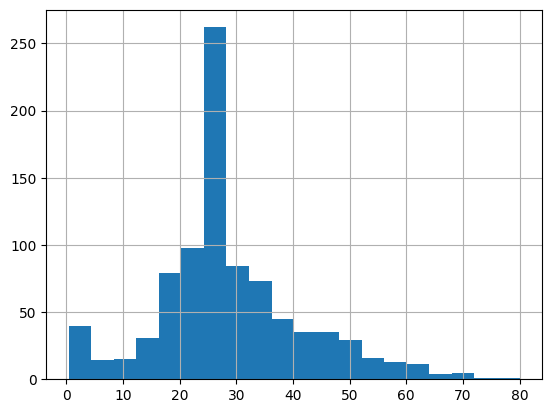

In [65]:
#Using sklearn.linear   (Logistic)
train_data=pd.read_csv("../Files/Titanic/train.csv")
test_data=pd.read_csv("../Files/Titanic/eval.csv")
train_data=train_data.drop(["deck"], axis=1)
test_data=test_data.drop(["deck"], axis=1)

#data cleaning
#print(train_data.isna().sum())
#print(test_data.isna().sum())
#print(train_data.describe())
#print(test_data.describe())
#print(train_data.dtypes)

#exploration
pd.concat((train_data,test_data), axis=0).age.hist(bins=20)

<Axes: >

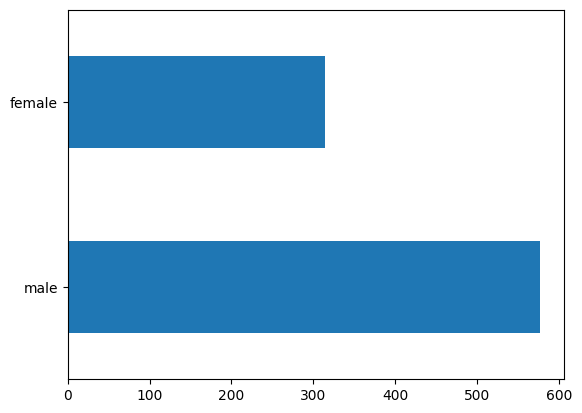

In [46]:
pd.concat((train_data,test_data), axis=0).sex.value_counts().plot(kind="barh")

<Axes: >

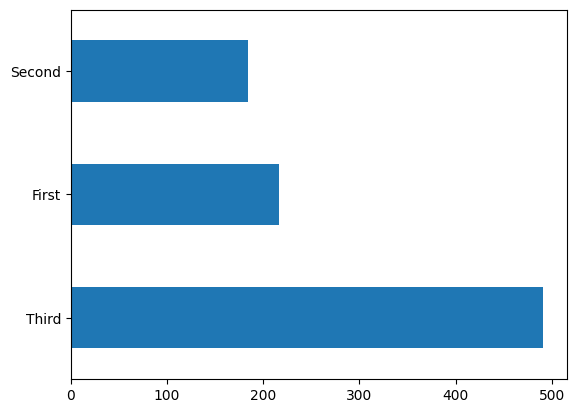

In [47]:
pd.concat((train_data,test_data), axis=0)["class"].value_counts().plot(kind="barh")

Text(0.5, 0, '% survivability')

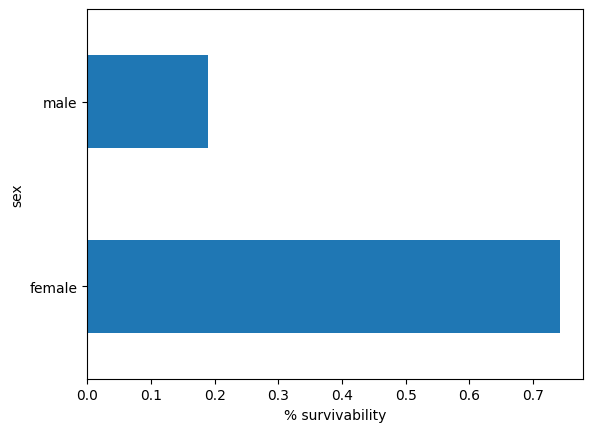

In [48]:
pd.concat((train_data,test_data), axis=0).groupby("sex").survived.mean().plot(kind="barh").set_xlabel("% survivability")

In [66]:
#getting target
train_target=train_data.pop("survived")         #this almost has the same effect as train_data["survived"] and automatically remove survived from the train/test daya
test_target=test_data.pop("survived")
targetcondition=["Dead", "Survived"]
colnames=train_data.columns

In [67]:
#encoding
objecttype=[]
for i in colnames:
    objecttype.append(i) if (train_data[i].dtypes=="object") else 0
    
encoder= ce.OrdinalEncoder(cols=objecttype)
encoder.fit(pd.concat((train_data, test_data)))                             #same as np.concatenate
train_data=encoder.transform(train_data)
test_data=encoder.transform(test_data)

In [68]:
#model of linearlogistic (Brute)
'''
for i in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
    model=LogisticRegression(solver=i, max_iter=10000)
    model.fit(train_data, train_target)
    predicted=model.predict(test_data)
    print(accuracy_score(test_target, predicted))
'''#sag

#merge train+test
data=pd.concat((train_data, test_data), axis=0)
target=pd.concat((train_target, test_target), axis=0).values

#scaling
scaler=StandardScaler()
scaler.fit(data.values)
data=scaler.transform(data.values)

#fit and getting score
model=LogisticRegression(solver='sag', max_iter=10000)
model.fit(data, target)
predicted=model.predict(data)
print(accuracy_score(target, predicted))

0.8080808080808081


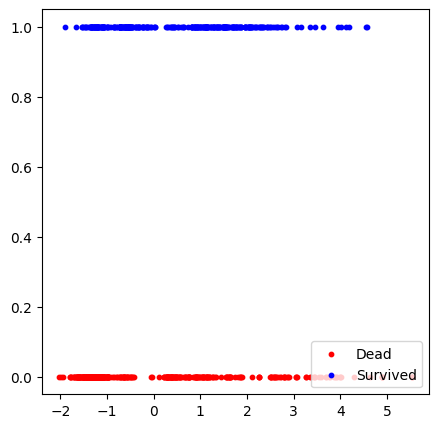

In [69]:
#Visualization by PCA
pcamodel=PCA(n_components=1, random_state=2312)
pcamodel.fit(data)
pcadata=pcamodel.transform(data)

fig, ax=plt.subplots(figsize=(5,5))
colour=["red", "blue"]
for i in np.unique(target):
    ax.scatter(pcadata[target==i,0], target[target==i] , c=colour[i], s=10, label=targetcondition[i])
plt.legend(loc="lower right")
plt.show()

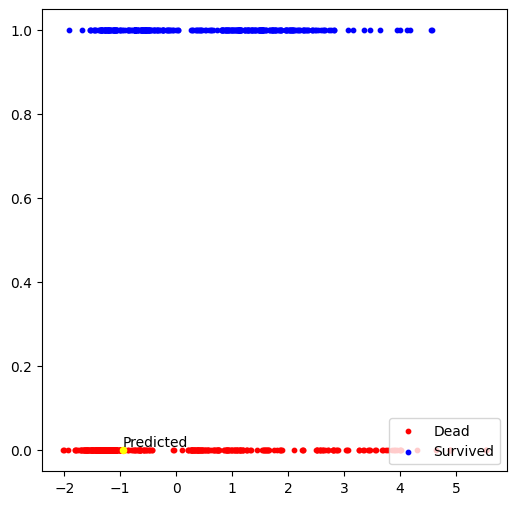

In [71]:
#trynna predict ur data cuz why fucking not? Lol! 
def wazittuya(urdata, visualize=False):
    urdata=pd.DataFrame(urdata, columns=colnames)
    urdata=encoder.transform(urdata)
    urdata=scaler.transform(urdata)
    thepredictofyurdata=model.predict(urdata)
    
    if visualize:
        #change urdata into 2 var with PCA
        urdata=pcamodel.transform(urdata)
        fig, ax =plt.subplots(figsize=(6,6))
        colour=["red", "blue"]
        for i in np.unique(target):
            ax.scatter(pcadata[target==i,0], target[target==i] , c=colour[i], s=10, label=targetcondition[i])
            ax.scatter(urdata[thepredictofyurdata==i,0], thepredictofyurdata[thepredictofyurdata==i] , c="yellow", s=20)
        XYloc=[urdata.flatten(), thepredictofyurdata.flatten()+0.01]
        ax.annotate("Predicted", XYloc)
        ax.legend(loc="lower right")
        
test=[["male", 42, 0, 1, 23.2, "first", "Cherbourg", "y"]]
wazittuya(test, visualize=True)
plt.legend(loc="lower right")
clear_output()
plt.show()    

So therefore based from what we just learnt from sklearn, regression steps (simp-lified) are mainly:

1. importing dataset
2. dataset cleaning
3. Data exploration (histogram, boxplot, etc ewrc)
3. scaling  (If needed but recommended)
4. encoder  (if there's categorical data)
5. train test split
5. getting the best Model fit with test data as accuracy measurement
6. use the entire dataset with the best model.fit configuration
7. Done

In [48]:
#Nowe we gonna use tensorflow!
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow.python.ops.numpy_ops import enable_numpy_behavior
enable_numpy_behavior()                                             #enable numpy behaviour on tensorflow

In [3]:
#Importing data and target

    #Importing data
train_data=pd.read_csv("../Files/Titanic/train.csv")
test_data=pd.read_csv("../Files/Titanic/eval.csv")

    #data exploration and data cleaning
# print(train_data.isna().sum())
# print(test_data.isna().sum())
# train_data.describe()
# test_data.describe()
                                                                        #yeah seems legit fr
    #get target
train_target=train_data.pop("survived")
test_target=test_data.pop("survived")
colnames=train_data.columns

In [5]:
#encoding categorical data
feature_column=[]                                         #for the tensorflow ANN later
for i in colnames:
    unique=(pd.concat((train_data, test_data), axis=0)[i]).unique()
    feature_column.append(tf.feature_column.categorical_column_with_vocabulary_list(i, unique)) if train_data[i].dtype=="object" else feature_column.append(tf.feature_column.numeric_column(i))
print(feature_column)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='n_siblings_spouses', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='parch', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-

In [28]:
#making an input for the tensorflow model (making a compactible tf dataset)

#shit only works when only you got the memory loc
def make_input_fn(data, target, num_epochs=10, shuffle=True, batch_size=32): 
  def input():
    ds=tf.data.Dataset.from_tensor_slices((dict(data), target))
    #print(list(ds.as_numpy_iterator())[1])                                           #accessor   (need to use as_numpy_iterator to access tf dataframe)
    if shuffle:
      ds.shuffle(1000)                                                                #gonna shuffle this thing 1000 times
    ds=ds.batch(batch_size).repeat(num_epochs)                                        #batch=splitting data into 32 parts, repeat=epoch
    return ds
  return input

train_input=make_input_fn(train_data, train_target)
test_input=make_input_fn(test_data, test_target, num_epochs=1, shuffle=False)

<_RepeatDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'n_siblings_spouses': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'deck': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'embark_town': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'alone': TensorSpec(shape=(None,), dtype=tf.string, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [7]:
#creating the model
regmodel=tf.estimator.LinearClassifier(feature_columns=feature_column)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Rhey\\AppData\\Local\\Temp\\tmp1q2bw5ug', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_ta

{'logits': array([-2.7872133], dtype=float32), 'logistic': array([0.05801907], dtype=float32), 'probabilities': array([0.94198096, 0.05801907], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}
0.7651515


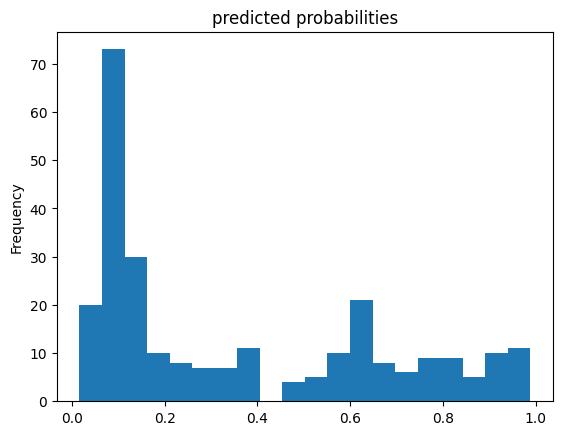

In [8]:
#fitting and evaluate the score of the data
from IPython.display import clear_output

regmodel.train(train_input)                                                                 #training model
getscore=regmodel.evaluate(test_input)                                                      #evaluate (same as sklearn.metrics but shrimpler)


#showing the probability of eachdata
pred_dicts = list(regmodel.predict(test_input))                                             #predict (almost as the same as evaluate ngl)
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])                        #getting the probability
print(probs)

probs.plot(kind='hist', bins=20, title='predicted probabilities')

clear_output()
print(pred_dicts[0])
print(getscore["accuracy"])

In [51]:
def inputforpredict(data, batchsize=32):
    def inputfn():
        ds=tf.data.Dataset.from_tensor_slices((dict(data)))
        ds=ds.batch(batchsize)
        return ds  
    return inputfn


def mamaiwannapredict(urdata):
    urdata=pd.DataFrame(urdata, columns=colnames)
    input_fn=inputforpredict(urdata)
    No=list(regmodel.predict(input_fn))
    return No

z=mamaiwannapredict([["male", 43, 1, 0, 32.1, "First", "F", "Southampton", "n"]])
temp=[i["class_ids"] for i in z]
print(np.array(temp).flatten())

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rhey\AppData\Local\Temp\tmp1q2bw5ug\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[0]
